16280.5


Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

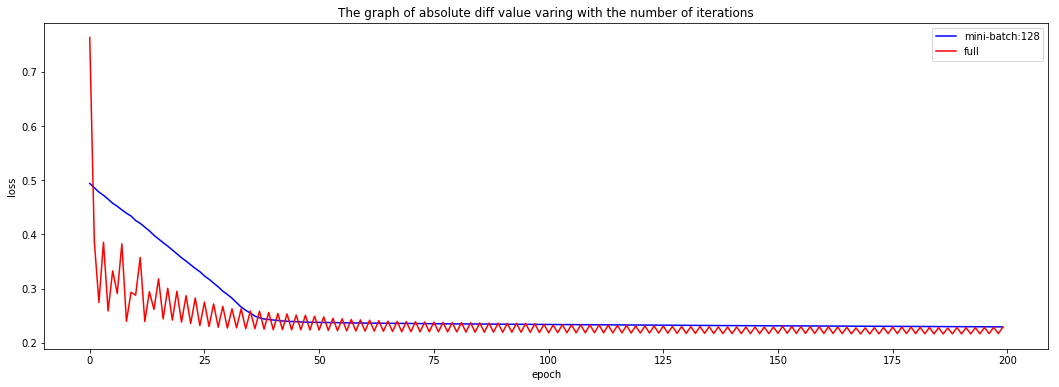

In [15]:
import numpy as np
import requests
r = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a")
t = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t")

def loss_function(x,y,w):
    C = 0.5
    return 1/2*(np.sum(w*w))+C*np.sum(np.maximum(0,1-y*np.dot(x,w)))

def grad(x,y,w):
    C = 0.5
    h = 1 - y * np.dot(x, w)
    y_hat = np.where(h >= 0, y, 0)
    return w - C*(x.T.dot(y_hat))

def getY(x,w):
    return np.where(x@w>0,1,-1)

from io import BytesIO
from sklearn.datasets import load_svmlight_file
X_train, Y_train = load_svmlight_file(BytesIO(r.content), n_features=123)
X_train = X_train.toarray()
Y_train = Y_train.reshape((-1, 1))

x_shape = X_train.shape
x0 = np.ones((x_shape[0],1))
X_train = np.column_stack((X_train,x0))

W = np.zeros((x_shape[1]+1,1))

X_test,Y_test = load_svmlight_file(BytesIO(t.content), n_features=123)
X_test = X_test.toarray()
Y_test = Y_test.reshape((-1, 1))

xtest_shape = X_test.shape
x00 = np.ones((xtest_shape[0],1))
X_test = np.column_stack((X_test,x00))

losses_val = []
losses_val_full = []
W1 = W

import random
for count in range(0,200):
    #choose 128 samples randomly
    i = random.randint(0,x_shape[0])
    x_sample = X_train[i:i+128,:]
    y_sample = Y_train[i:i+128]
    
    #SGD
    W = W - 0.0001*grad(x_sample,y_sample,W)
    loss_val = loss_function(X_test,Y_test,W)
    losses_val.append(loss_val/Y_test.size)
    
    #full training set
    W1 = W1 - 0.0001*grad(X_train,Y_train,W1)
    loss_val_full = loss_function(X_test,Y_test,W1)
    losses_val_full.append(loss_val_full/Y_test.size)
    

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_val, "-", color="b", label="mini-batch:128")
plt.plot(losses_val_full, "-", color="r", label="full")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")